In [1]:
# Importing required modules:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preparation:

In [2]:
# Reading or importing csv file to dataframe:

df = pd.read_csv('C:\\Users\\e_chi\\OneDrive - Nexford University\\BAN6420_Assignments\\Netflix Data Visualization\\Netflix_shows_movies.csv')

# Data Exploration: 

In [8]:
# Descriptive statistics including all (numeric and non-numeric):

df.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [9]:
# Descriptive statistics including object (non-numeric):

df.describe(include= 'object')

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,14,201,461,6226
top,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,2027,1321,299,3


In [4]:
# Checking for missing values in data frame:
df.isna()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,False,False,False,True,False,False,True,False,False,False,False,False
6230,False,False,False,True,False,False,True,False,False,False,False,False
6231,False,False,False,True,True,True,True,False,True,False,False,False
6232,False,False,False,True,False,False,True,False,False,False,False,False


In [90]:
# Summary of missing values:
df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Data Cleaning:

In [10]:
# Dropping selected columns not required for visualisation 
# and having too many missing values:

df.drop(['director', 'cast', 'country'], axis = 1, inplace= True)

In [12]:
# Dropping other rows with missing values:

df.dropna(inplace = True)

In [13]:
# Summary of missing values after removing missing values:

df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
# saving the cleaned data frame to csv:

df.to_csv('Netflix_shows_movies_clean.csv', index = False)

In [17]:
# Importing the clean data set in readiness for visualisation:

df_clean = pd.read_csv('Netflix_shows_movies_clean.csv')

In [32]:
listed_in_counts = df_clean['listed_in'].value_counts()
listed_in_counts

listed_in
Documentaries                                          299
Stand-Up Comedy                                        273
Dramas, International Movies                           248
Dramas, Independent Movies, International Movies       186
Comedies, Dramas, International Movies                 174
                                                      ... 
Classic & Cult TV, Kids' TV, TV Comedies                 1
British TV Shows, TV Comedies, TV Dramas                 1
Romantic TV Shows, TV Action & Adventure, TV Dramas      1
TV Comedies, TV Dramas, TV Horror                        1
Reality TV, Spanish-Language TV Shows                    1
Name: count, Length: 461, dtype: int64

In [41]:
# defining a function to group genres to more manageable categories:

def group_genres(genre):
    if 'Documentaries' in genre:
        return 'Documentaries'
    elif 'Stand-Up Comedy' in genre:
        return 'Comedy'
    elif 'Dramas' and 'International Movies' in genre:
        return 'Drama'
    elif 'TV' in genre:
        return 'TV Show'
    elif 'Horror' in genre:
        return 'Horror'
    elif 'Action & Adventure' in genre:
        return 'Action'
    elif 'Children & Family' in genre:
        return 'Family'
    elif 'Docuseries' in genre:
        return 'Docuseries'
    elif 'Romantic Movies' in genre:
        return 'Romance'
    elif 'Thrillers' in genre:
        return 'Thrillers'
    else:
        return 'Others'
        

In [42]:
# Applying the function to create a new genre column:

df_clean['genres'] = df_clean['listed_in'].apply(group_genres)

In [43]:
# Genres frequency:

genre_counts = df_clean['genres'].value_counts()
genre_counts

genres
TV Show          1847
Drama            1711
Documentaries     668
Others            553
Family            346
Comedy            321
Action            284
Horror            155
Thrillers         146
Romance           119
Docuseries         64
Name: count, dtype: int64

In [23]:
# Ratings frequency:

rating_counts = df_clean['rating'].value_counts()
rating_counts

rating
TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64

# Data Visualization:

## 1. Most Watched Genres:

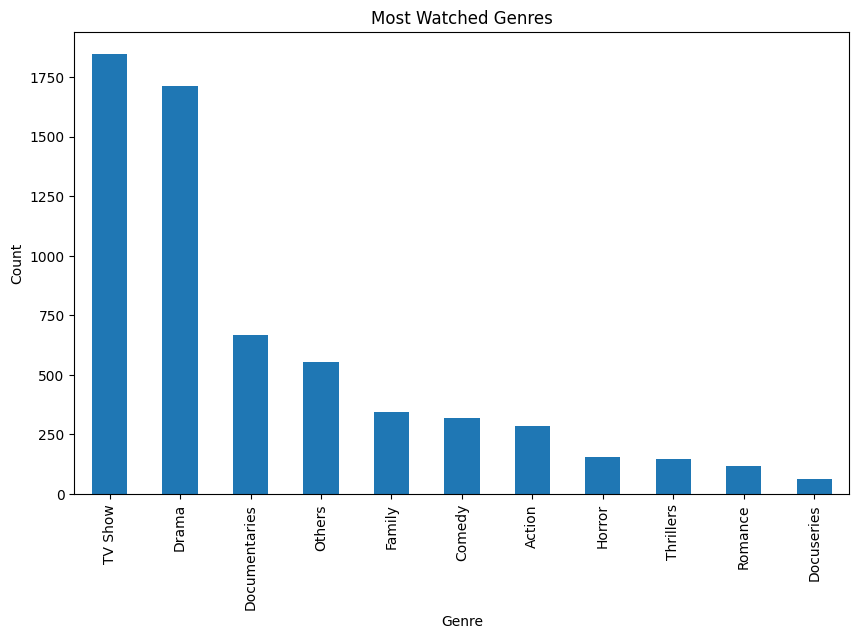

In [45]:
# Using matplotlib:

plt.figure(figsize=(10,6))
genre_counts.plot(kind = 'bar')
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

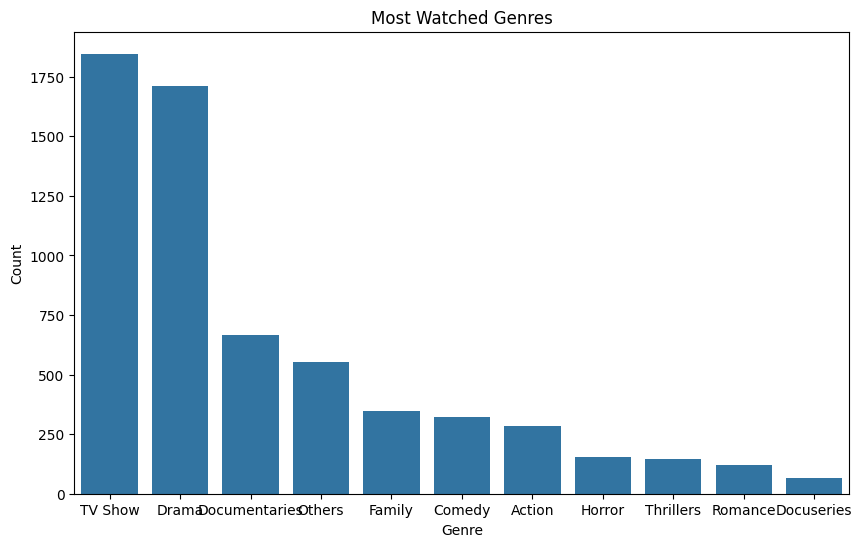

In [86]:
# Using Seaborn:

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## 2. Ratings Distribution

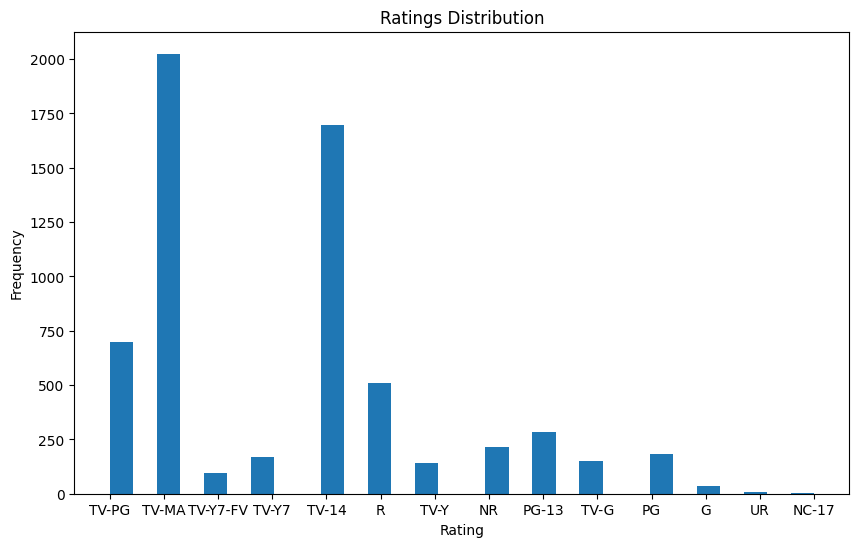

In [87]:
# Using Matplotlib:

plt.figure(figsize=(10, 6))
df_clean['rating'].hist(bins=30)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


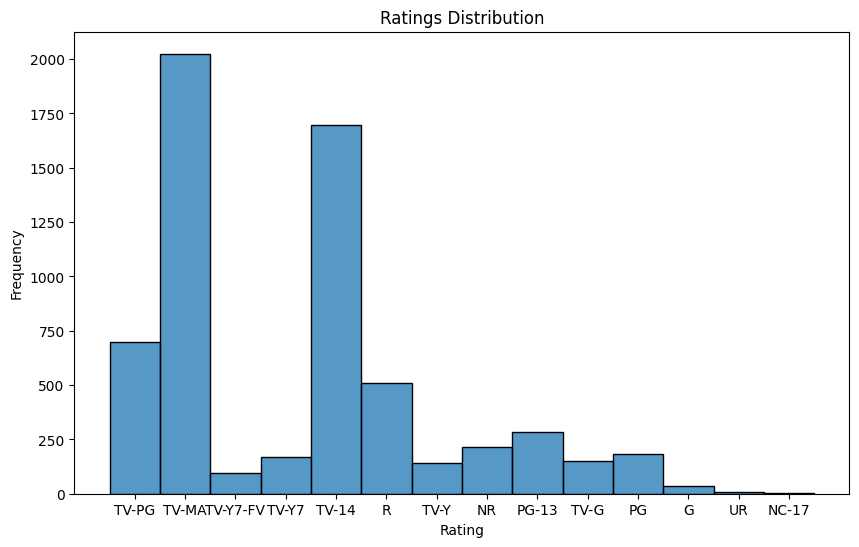

In [82]:
# Using Seaborn:

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['rating'], bins=30)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 2b. Trying bar plots for ratings distribution

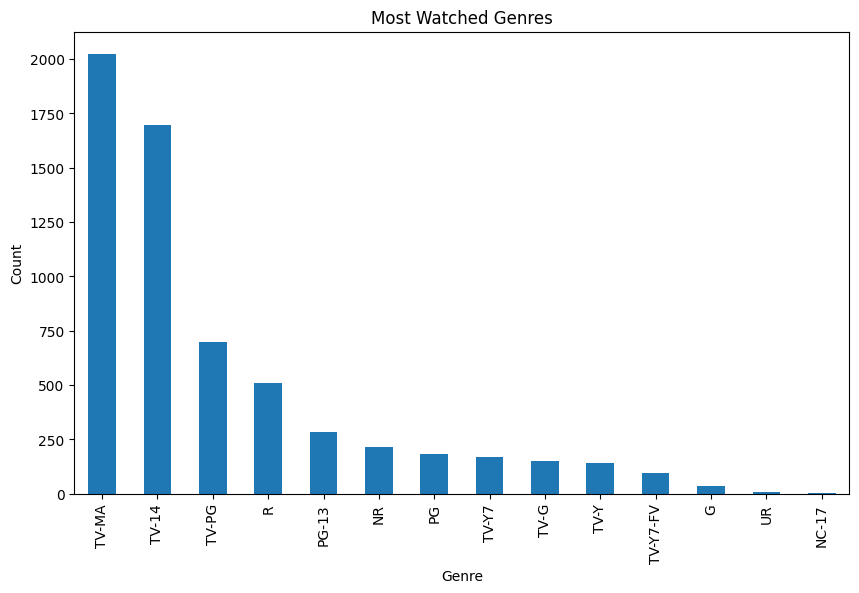

In [88]:
# Using matplotlib:

plt.figure(figsize=(10,6))
rating_counts.plot(kind = 'bar')
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

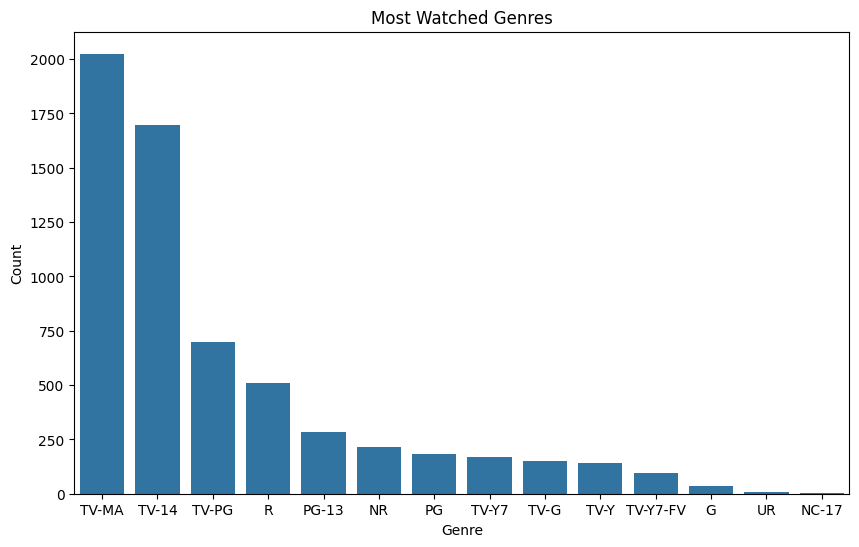

In [89]:
# Using Seaborn:

plt.figure(figsize=(10, 6))
sns.barplot(x= rating_counts.index, y=rating_counts.values)
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()